Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import train test split
from sklearn.model_selection import train_test_split

In [2]:
# import csv file
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

EDA

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
# null values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
# fill bmi with mean
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [8]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Unique values

In [9]:
# work unique values
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [10]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [11]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

Other

In [12]:
# drop ID
df.drop('id', axis=1, inplace=True)

Graphs

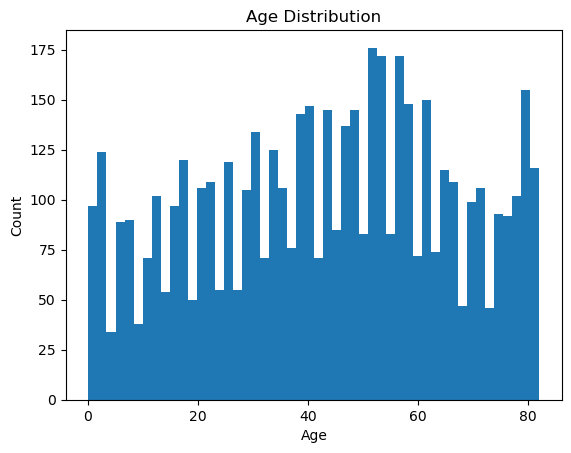

In [13]:
# histogram of age distribution, higlight positive cases
plt.hist(df['age'], bins=50)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()


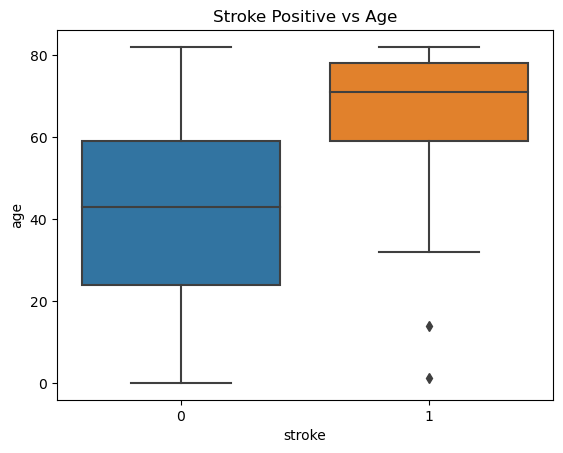

In [14]:
# box plot for stroke positive vs age
sns.boxplot(x='stroke', y='age', data=df)
plt.title('Stroke Positive vs Age')
plt.show()

Children and stroke

In [15]:
# cases of stroke under age of 35
df[df['age'] < 35].count()
# count of cases of stroke under age of 35
df[df['age'] < 35]['stroke'].value_counts()


0    1842
1       3
Name: stroke, dtype: int64

In [16]:
# show rows of childern who had stroke
df[(df['age'] < 18) & (df['stroke'] == 1)]
# only two cases - gonna drop later

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,Female,1.32,0,0,No,children,Urban,70.37,28.893237,Unknown,1
245,Female,14.00,0,0,No,children,Rural,57.93,30.900000,Unknown,1


Total cases of stroke in dataset

In [17]:
df[['age', 'stroke']].groupby(['age'], as_index=False).mean().sort_values(by='stroke', ascending=False)

,age,stroke
101,80.0,0.242857
102,81.0,0.233333
95,74.0,0.225000
99,78.0,0.205882
100,79.0,0.200000
...,...,...
32,11.0,0.000000
31,10.0,0.000000
30,9.0,0.000000
29,8.0,0.000000


Stroke rate:  0.0487279843444227


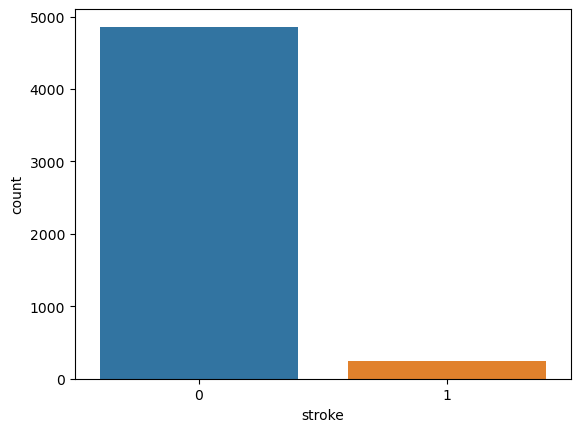

In [23]:
sns.countplot(x='stroke', data=df)
print("Stroke rate: ", df.stroke.sum()/df.stroke.count())

In [18]:
age_bins = [0, 20, 40, 60, 80, 150]  # Define age boundaries
age_labels = ['0-20', '20-40', '40-60', '60-80', '80+']  # Labels for the age groups
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)


In [19]:
age_stroke_counts = df.groupby(['age_group', 'stroke']).size().unstack().fillna(0)


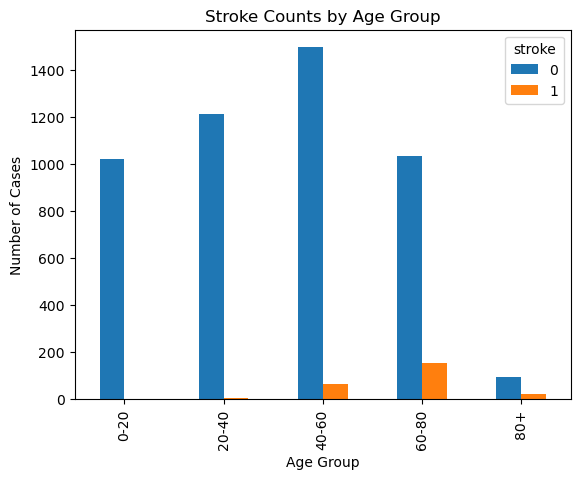

In [20]:
age_stroke_counts.plot(kind='bar', stacked=False)
plt.title('Stroke Counts by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.show()


In [21]:
df_stroke = df[df.stroke==1]
df_stroke.head()
print(df_stroke.shape)

(249, 12)


In [22]:
df_stroke.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.0
mean,67.728193,0.265060,0.188755,132.544739,30.217789,1.0
std,12.727419,0.442254,0.392102,61.921056,5.825589,0.0
min,1.320000,0.000000,0.000000,56.110000,16.900000,1.0
25%,59.000000,0.000000,0.000000,79.790000,27.000000,1.0
50%,71.000000,0.000000,0.000000,105.220000,28.893237,1.0
75%,78.000000,1.000000,0.000000,196.710000,32.500000,1.0
max,82.000000,1.000000,1.000000,271.740000,56.600000,1.0


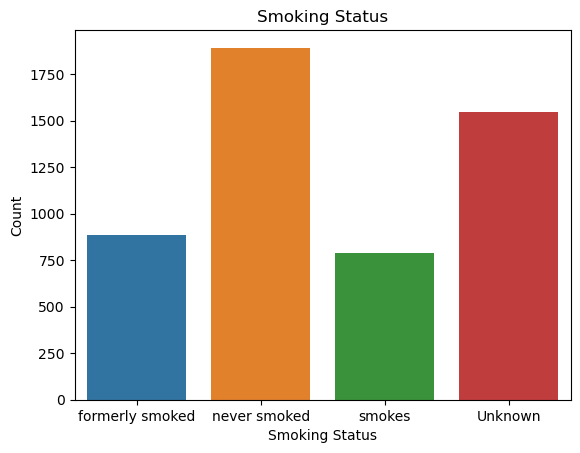

In [24]:
# graph of smokers
sns.countplot(x='smoking_status', data=df)
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.title('Smoking Status')
plt.show()

In [25]:
# precentige values of smokers
df['smoking_status'].value_counts(normalize=True)

never smoked       0.370254
Unknown            0.302153
formerly smoked    0.173190
smokes             0.154403
Name: smoking_status, dtype: float64

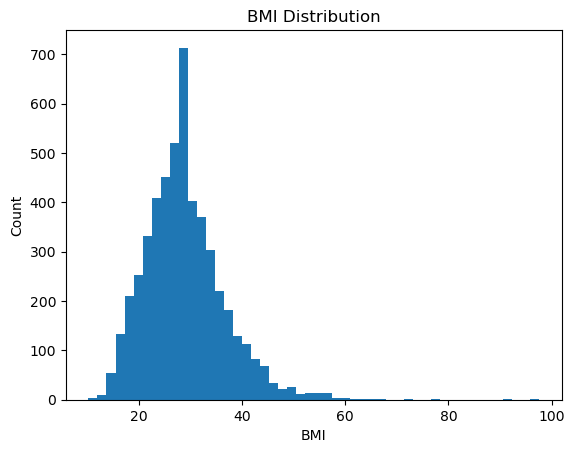

In [26]:
# graph of bmi distribution
plt.hist(df['bmi'], bins=50)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('BMI Distribution')
plt.show()

In [27]:
# percentige of genders
df['gender'].value_counts(normalize=True)

Female    0.585910
Male      0.413894
Other     0.000196
Name: gender, dtype: float64

In [28]:
# gender unique values
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [29]:
df[df['gender'] == 'Other']


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0,20-40


In [30]:
# delete row with gender "other" (only 1 entry)
row_to_remove = 3116
df = df.drop(row_to_remove)

C:\Users\tomas\AppData\Local\Temp\ipykernel_15240\603918181.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = stroke_positive_data.corr()


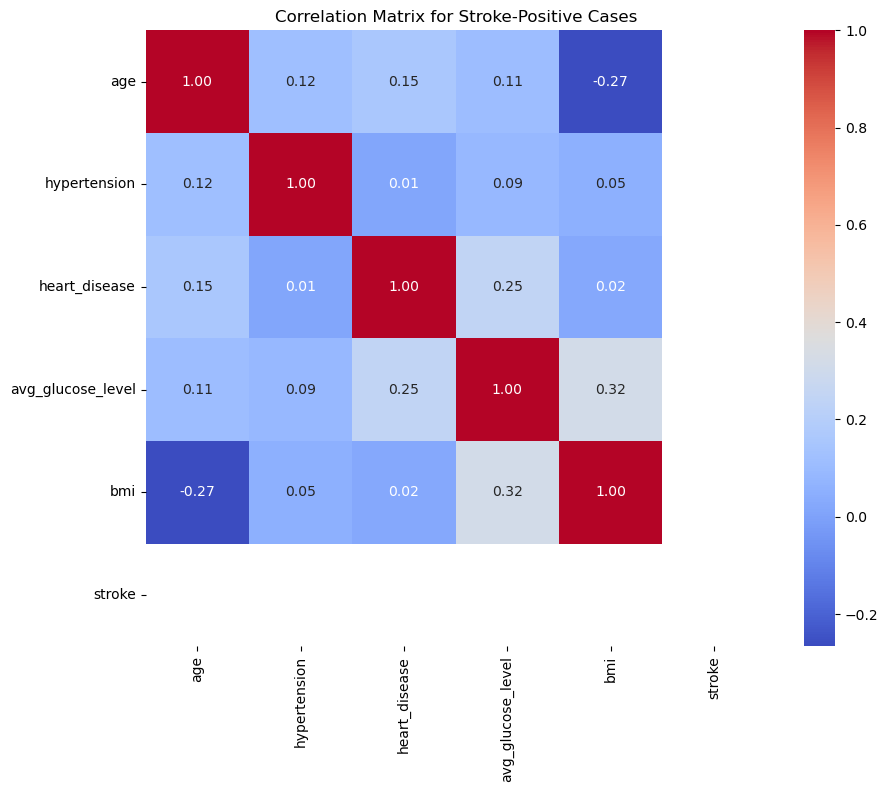

In [31]:
# Correlation Matrix for Stroke-Positive Cases

stroke_positive_data = df[df['stroke'] == 1]
correlation_matrix = stroke_positive_data.corr()
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Stroke-Positive Cases')
plt.show()

In [32]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,60-80
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,60-80
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,60-80
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,40-60
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,60-80


Endcoding

In [33]:
# drop age group
df.drop('age_group', axis=1, inplace=True)

In [34]:
# get dummies
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)


In [35]:
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,1,0,0,1,0,0,0,1,0


In [36]:
# remove children from dataset
df_kid = df[df['age'] < 18]
df_kid.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
162,1.32,0,0,70.37,28.893237,1,0,0,0,0,0,1,1,0,0,0
245,14.00,0,0,57.93,30.900000,1,0,0,0,0,0,1,0,0,0,0
249,3.00,0,0,95.12,18.000000,0,1,0,0,0,0,1,0,0,0,0
251,8.00,0,0,110.89,17.600000,0,0,0,0,1,0,0,1,0,0,0
253,14.00,0,0,161.28,19.100000,0,1,0,1,0,0,0,0,0,0,0


In [37]:
# drop df_kid from dataset
df.drop(df_kid.index, inplace=True)


In [38]:
df[df['age'] < 18]

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes


SMOTE

In [39]:
#%pip install --upgrade scikit-learn
#%pip install --upgrade imbalanced-learn

In [40]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [41]:
# define features
features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender_Male', 'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']

X = df[features]
y = df['stroke']

In [42]:
# Calculate the desired ratio of synthetic samples to the minority class size
desired_ratio = 1

X = df.drop('stroke', axis=1)
y = df['stroke']

# Create a SMOTE object with the desired sampling strategy
smote = SMOTE(sampling_strategy=desired_ratio, random_state=42)

# Resample the data
X_smote, y_smote = smote.fit_resample(X, y)

# Combine the synthetic samples with the original data
df_smote = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
df_smote.columns = df.columns

In [43]:
df_smote.shape

(8012, 16)

In [44]:
# number of stroke positive cases in df_smote
df_smote[df_smote['stroke'] == 1].shape


(2517, 16)

In [51]:
# number of stroke negative cases in df_smote
df_smote[df_smote['stroke'] == 0].shape


(5495, 16)

Stroke rate:  0.31415376934598105
0    5495
1    2517
Name: stroke, dtype: int64


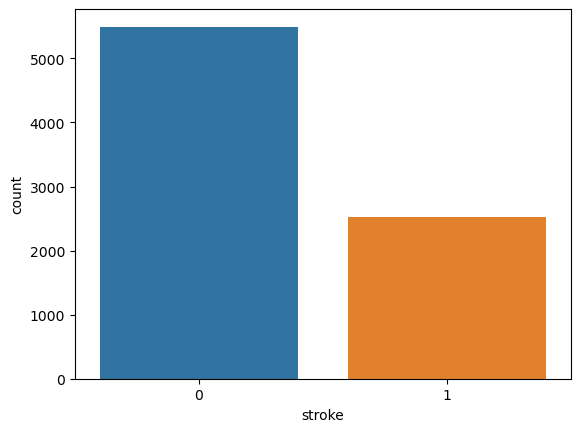

In [55]:
# plot ratio of stroke 1 and 0 in df_smote
sns.countplot(x='stroke', data=df_smote)
print("Stroke rate: ", df_smote.stroke.sum()/df_smote.stroke.count())
# print the number of instances with each value of age, sex, cp, trestbps, chol, thalach, exang
print(df_smote.stroke.value_counts())
# create a new column called 'target' that has values equal to either "Yes" or "No", depending on whether they have had a stroke


In [45]:
# create train test split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [46]:
# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [47]:
# create model using RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
# fit the model on training data and target labels
model.fit(X_train, y_train)
# predict the labels for test data
y_pred = model.predict(X_test)

In [52]:
# calculate f1 for positively predicted
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='binary')



0.9335863377609108

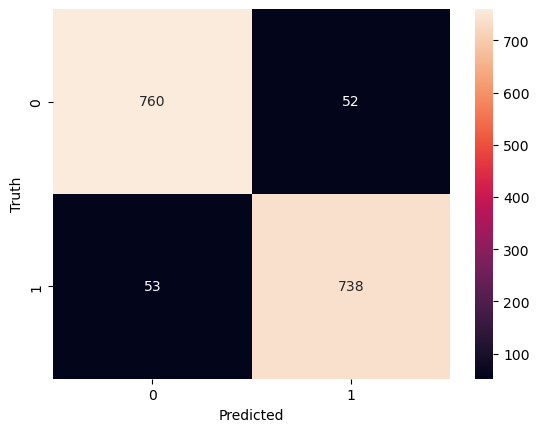

In [48]:
# create confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# plotting the confusion matrix using seaborn library
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
